### 前期

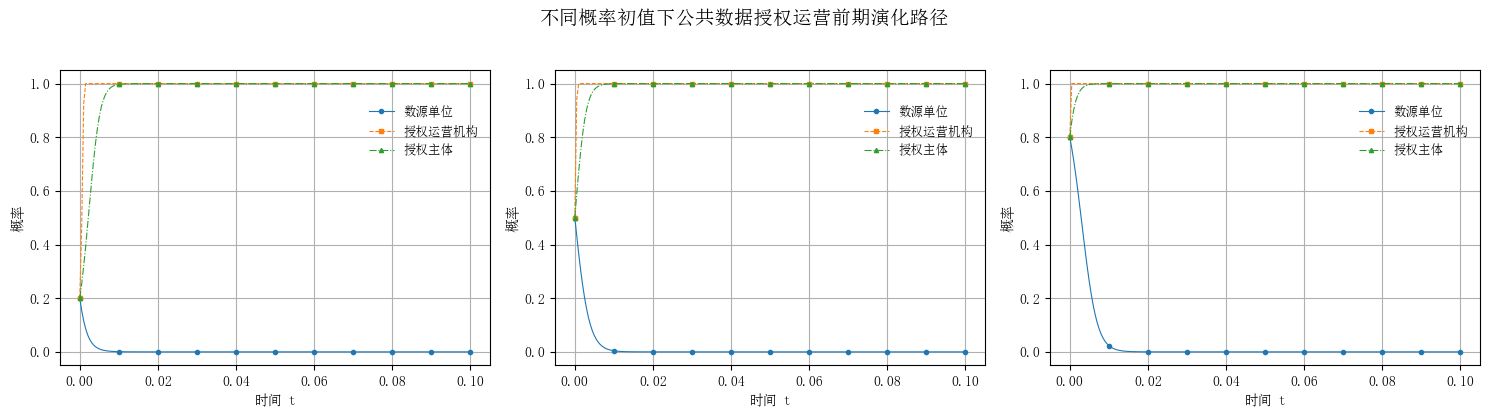

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimSun']
rcParams['axes.unicode_minus'] = False

# === 参数设置 ===

C1 = 0
C2 = 3304
P1 = 413.32
P2 = 1698
R  = 4600
g = 0.15
U1 = 0.4 * C2
U2 = 0.1 * C2
W1 = 1.2 * R
W2 = 1.2 * (C2 + P2)
L1 = 0.1 * W1
L2 = 0.05 * W1
T = 0.9 * R
p = 0.2
Z1 = 0.1 * C2
Z2 = 0.05 * C2
k1 = 1.1
k2 = 0.9
a = 0.12
b = 1 - 0.12 - 0.12
c = 0.12

# === 复制动态方程 ===
def Fx(x, y, z):
    return x*(1-x) * (a*z*(k1-k2)*(y*W1 + (1-y)*W2) + L1 - L2 + p*(Z1+Z2) - U1 + U2)

def Fy(x, y, z):
    return y*(1-y)*(1-g) * ((z*x*b*k1 + z*(1-x)*b*k2 + (1-z)*x*k1 + (1-z)*(1-x)*k2)*(W1-W2) + C2 - C1 + P2 - P1)

def Fz(x, y, z):
    return z*(1-z) * ((x*k1 + (1-x)*k2)*(y*W1 + (1-y)*W2)*(c + g*(b-1)) - R*(1-g) + T)

# === 时间设置 ===
dt = 0.0005
steps = 200
t = np.linspace(0, dt*steps, steps+1)

# === 三个相同初值的实验 ===
initial_values = [0.2, 0.5, 0.8]

# === 创建大图（1 行 3 列） ===
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, init in zip(axes, initial_values):

    x = np.zeros(steps+1)
    y_val = np.zeros(steps+1)
    z = np.zeros(steps+1)

    x[0] = init
    y_val[0] = init
    z[0] = init

    for i in range(steps):
        x[i+1] = x[i] + dt * Fx(x[i], y_val[i], z[i])
        y_val[i+1] = y_val[i] + dt * Fy(x[i], y_val[i], z[i])
        z[i+1] = z[i] + dt * Fz(x[i], y_val[i], z[i])

        x[i+1] = np.clip(x[i+1], 0, 1)
        y_val[i+1] = np.clip(y_val[i+1], 0, 1)
        z[i+1] = np.clip(z[i+1], 0, 1)

    # === 绘制子图 ===
    ax.plot(t, x, label='数源单位', linestyle='-', color='tab:blue',
            marker='o', markevery=20, markersize=3, linewidth=0.8)
    ax.plot(t, y_val, label='授权运营机构', linestyle='--', color='tab:orange',
            marker='s', markevery=20, markersize=3, linewidth=0.8)
    ax.plot(t, z, label='授权主体', linestyle='-.', color='tab:green',
            marker='^', markevery=20, markersize=3, linewidth=0.8)

    ax.set_xlabel('时间 t')
    ax.set_ylabel('概率')
    ax.grid(True)

    # === 每个子图单独图例 ===
    ax.legend(loc='upper right',
          bbox_to_anchor=(1, 0.92),
          fontsize=9,
          frameon=False)

# === 添加大标题 ===
fig.suptitle('不同概率初值下公共数据授权运营前期演化路径', fontsize=14, y=1.03)

plt.tight_layout()
plt.show()


### 中期（成本考虑R，T = 0.75R）

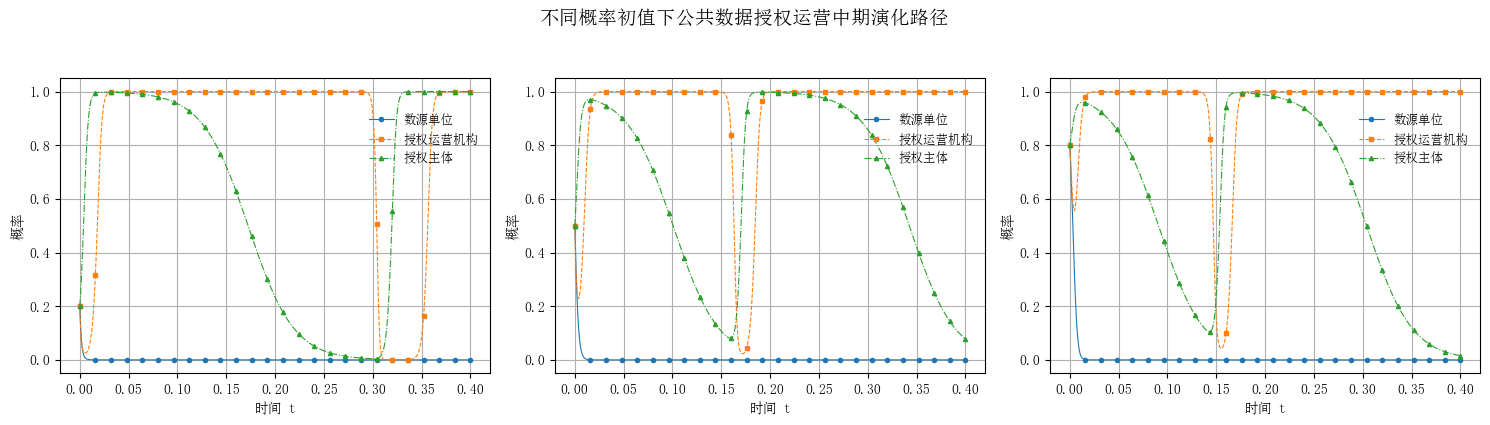

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimSun']
rcParams['axes.unicode_minus'] = False

# === 参数设置（中期） ===

C1 = 0
C2 = 3304
P1 = 413.32
P2 = 1698
R  = 4600
g  = 0.15
U1 = 0.4 * C2
U2 = 0.1 * C2
W1 = 1.2 * R
W2 = 1.2 * (C2 + P2 + R)
L1 = 0.1 * W1
L2 = 0.05 * W1
T = 0.75 * R
p = 0.2
Z1 = 0.1 * C2
Z2 = 0.05 * C2
k1 = 1.1
k2 = 0.9
a = 0.12
b = 1 - 0.12 - 0.12
c = 0.12

# === 复制动态方程 ===
def Fx(x, y, z):
    return x*(1-x) * (
        a*z*(k1-k2)*(y*W1 + (1-y)*W2) +
        L1 - L2 + p*(Z1+Z2) - U1 + U2
    )

def Fy(x, y, z):
    return y*(1-y)*(1-g) * (
        ( z*x*b*k1 + z*(1-x)*b*k2 +
          (1-z)*x*k1 + (1-z)*(1-x)*k2 ) * (W1-W2)
        + C2 - C1 + P2 - P1
    )

def Fz(x, y, z):
    return z*(1-z) * (
        (x*k1 + (1-x)*k2)*(y*W1 + (1-y)*W2)*(c + g*(b-1))
        - R*(1-g) + T
    )

# === 时间设置 ===
dt = 0.0008
steps = 500
t = np.linspace(0, dt*steps, steps+1)

# === 初值列表（与前期一样）===
initial_values = [0.2, 0.5, 0.8]

# === 创建 1×3 子图 ===
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, init in zip(axes, initial_values):

    x = np.zeros(steps+1)
    y_val = np.zeros(steps+1)
    z = np.zeros(steps+1)

    x[0] = init
    y_val[0] = init
    z[0] = init

    # === 欧拉积分 ===
    for i in range(steps):
        x[i+1] = x[i] + dt * Fx(x[i], y_val[i], z[i])
        y_val[i+1] = y_val[i] + dt * Fy(x[i], y_val[i], z[i])
        z[i+1] = z[i] + dt * Fz(x[i], y_val[i], z[i])

        x[i+1] = np.clip(x[i+1], 0, 1)
        y_val[i+1] = np.clip(y_val[i+1], 0, 1)
        z[i+1] = np.clip(z[i+1], 0, 1)

    # === 绘制子图 ===
    ax.plot(t, x, label='数源单位', linestyle='-', color='tab:blue',
            marker='o', markevery=20, markersize=3, linewidth=0.8)
    ax.plot(t, y_val, label='授权运营机构', linestyle='--', color='tab:orange',
            marker='s', markevery=20, markersize=3, linewidth=0.8)
    ax.plot(t, z, label='授权主体', linestyle='-.', color='tab:green',
            marker='^', markevery=20, markersize=3, linewidth=0.8)

    ax.set_xlabel('时间 t')
    ax.set_ylabel('概率')
    ax.grid(True)

    # 每个子图的独立图例
    ax.legend(
        loc='upper right',
        bbox_to_anchor=(1, 0.92),
        fontsize=9,
        frameon=False
    )

# === 总标题 ===
fig.suptitle('不同概率初值下公共数据授权运营中期演化路径', fontsize=14, y=1.05)

plt.tight_layout()
plt.show()


### 后期

1.C2下降了25%

2.R增长到8000

3.公共数据授权运营移出高新技术企业范围，税率恢复25%

4.成本利润率同步调整为30%（25% + 5%）

5.T = 0.6R

6.p = 0.8

7.k1 = 1.2

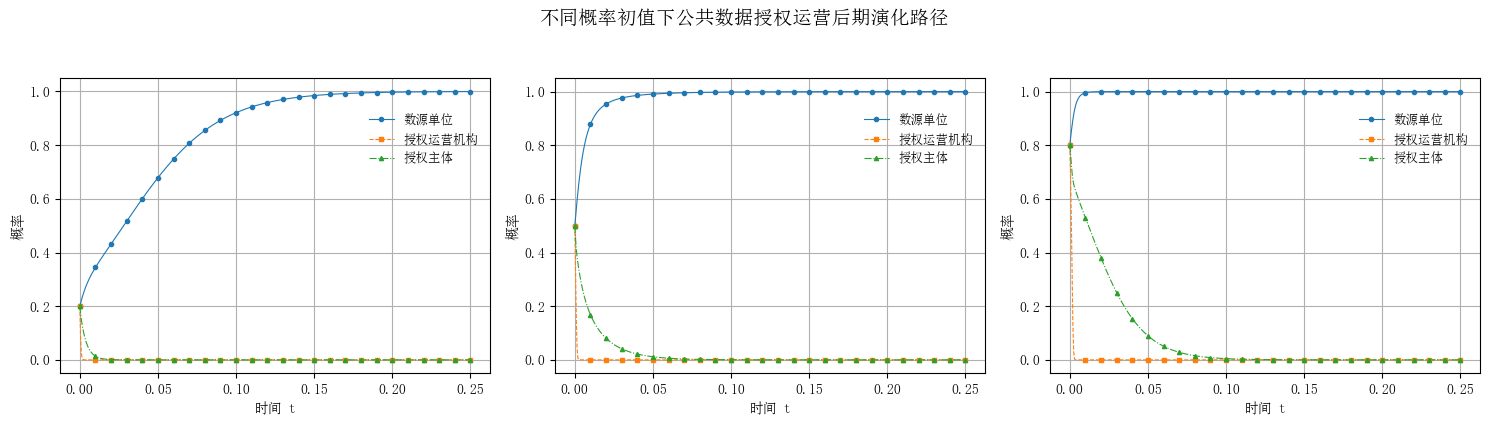

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimSun']  # 使用中文字体
rcParams['axes.unicode_minus'] = False     # 防止负号显示成方块

# === 参数设置（后期）===

C1 = 0
C2 = 2478

P1 = 413.32
P2 = 1698
R  = 8000

g  = 0.25

U1 = 0.4 * C2
U2 = 0.1 * C2

W1 = 1.2 * R
W2 = 1.3 * (C2 + P2 + R)

L1 = 0.1 * W1
L2 = 0.05 * W1

T = 0.6 * R
p = 0.8

Z1 = 0.1 * C2
Z2 = 0.05 * C2

k1 = 1.2
k2 = 0.9

a = 0.12
b = 1 - 0.12 - 0.12
c = 0.12

# === 复制动态方程 ===
def Fx(x, y, z):
    return x*(1-x) * (
        a*z*(k1-k2)*(y*W1 + (1-y)*W2)
        + L1 - L2 + p*(Z1+Z2)
        - U1 + U2
    )

def Fy(x, y, z):
    return y*(1-y)*(1-g) * (
        ( z*x*b*k1 + z*(1-x)*b*k2
          + (1-z)*x*k1 + (1-z)*(1-x)*k2 ) * (W1 - W2)
        + C2 - C1 + P2 - P1
    )

def Fz(x, y, z):
    return z*(1-z) * (
        (x*k1 + (1-x)*k2)*(y*W1 + (1-y)*W2)*(c + g*(b-1))
        - R*(1-g) + T
    )

# === 数值积分设置 ===
dt = 0.0005
steps = 500
t = np.linspace(0, dt*steps, steps+1)

# === 初值列表 ===
initial_values = [0.2, 0.5, 0.8]

# === 创建 1×3 子图 ===
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, init in zip(axes, initial_values):

    x = np.zeros(steps+1)
    y_val = np.zeros(steps+1)
    z = np.zeros(steps+1)

    x[0] = init
    y_val[0] = init
    z[0] = init

    # === 欧拉积分 ===
    for i in range(steps):
        x[i+1]     = x[i]     + dt * Fx(x[i], y_val[i], z[i])
        y_val[i+1] = y_val[i] + dt * Fy(x[i], y_val[i], z[i])
        z[i+1]     = z[i]     + dt * Fz(x[i], y_val[i], z[i])

        x[i+1]     = np.clip(x[i+1], 0, 1)
        y_val[i+1] = np.clip(y_val[i+1], 0, 1)
        z[i+1]     = np.clip(z[i+1], 0, 1)

    # === 绘图 ===
    ax.plot(t, x, label='数源单位', linestyle='-', color='tab:blue',
            marker='o', markevery=20, markersize=3, linewidth=0.8)

    ax.plot(t, y_val, label='授权运营机构', linestyle='--', color='tab:orange',
            marker='s', markevery=20, markersize=3, linewidth=0.8)

    ax.plot(t, z, label='授权主体', linestyle='-.', color='tab:green',
            marker='^', markevery=20, markersize=3, linewidth=0.8)

    ax.set_xlabel('时间 t')
    ax.set_ylabel('概率')
    ax.grid(True)

    # 每个子图单独图例（微调位置，保持一致风格）
    ax.legend(loc='upper right',
              bbox_to_anchor=(1, 0.92),
              fontsize=9,
              frameon=False)

# === 总标题 ===
fig.suptitle('不同概率初值下公共数据授权运营后期演化路径', fontsize=14, y=1.05)

plt.tight_layout()
plt.show()


### 敏感度测试-数源单位

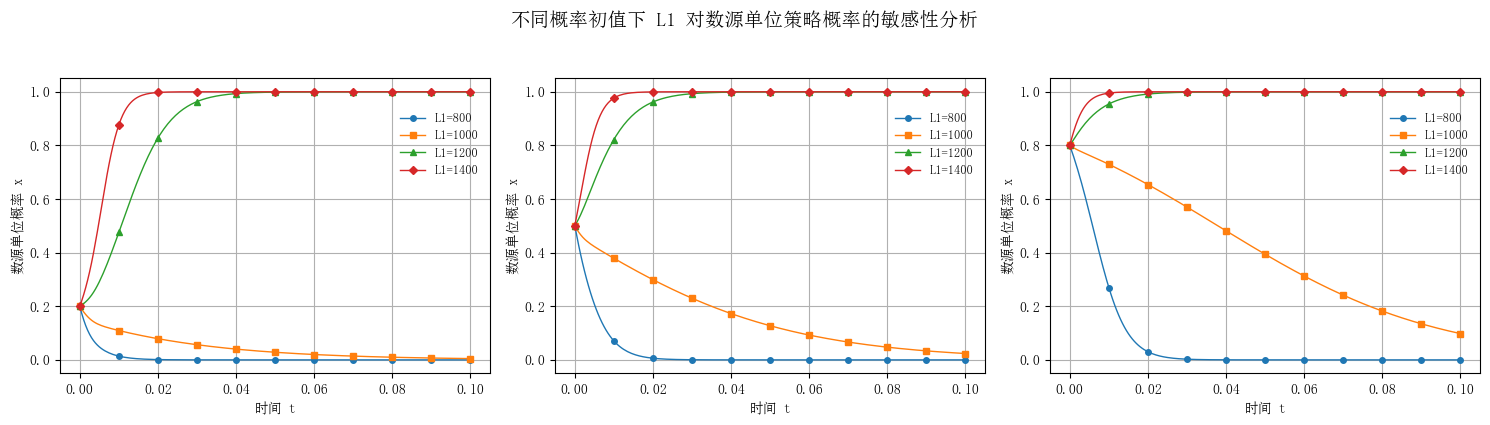

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimSun']
rcParams['axes.unicode_minus'] = False

# === 参数设置（后期）===
C1 = 0
C2 = 3304
P1 = 413.32
P2 = 1698
R  = 4600
g  = 0.15
U1 = 0.4 * C2
U2 = 0.1 * C2
W1 = 1.2 * R
W2 = 1.2 * (C2 + P2)
L2 = 0.05 * W1
T = 0.9*R
p = 0.2
Z1 = 0.1 * C2
Z2 = 0.05 * C2
k1 = 1.1
k2 = 0.9
a = 0.12
b = 1 - 0.12 - 0.12
c = 0.12

# === 复制动态方程 ===
def Fx(x, y, z, L1):
    return x*(1-x) * (a*z*(k1-k2)*(y*W1 + (1-y)*W2) + L1 - L2 + p*(Z1+Z2) - U1 + U2)

def Fy(x, y, z):
    return y*(1-y)*(1-g) * ((z*x*b*k1 + z*(1-x)*b*k2 + (1-z)*x*k1 + (1-z)*(1-x)*k2)*(W1-W2) + C2 - C1 + P2 - P1)

def Fz(x, y, z):
    return z*(1-z) * ((x*k1 + (1-x)*k2)*(y*W1 + (1-y)*W2)*(c + g*(b-1)) - R*(1-g) + T)

# === 欧拉积分参数 ===
dt = 0.0005
steps = 200
t = np.linspace(0, dt*steps, steps+1)

# === 初值列表 ===
initial_values = [0.2, 0.5, 0.8]

# === L1 参数扫描 ===
L1_values = [800, 1000, 1200, 1400]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
markers = ['o', 's', '^', 'D']

# === 创建 1×3 子图 ===
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, init in zip(axes, initial_values):
    for idx, L1_scan in enumerate(L1_values):
        x = np.zeros(steps+1)
        y = np.zeros(steps+1)
        z = np.zeros(steps+1)
        x[0] = y[0] = z[0] = init

        for i in range(steps):
            x[i+1] = x[i] + dt * Fx(x[i], y[i], z[i], L1_scan)
            y[i+1] = y[i] + dt * Fy(x[i], y[i], z[i])
            z[i+1] = z[i] + dt * Fz(x[i], y[i], z[i])
            x[i+1] = np.clip(x[i+1], 0, 1)
            y[i+1] = np.clip(y[i+1], 0, 1)
            z[i+1] = np.clip(z[i+1], 0, 1)

        ax.plot(t, x, label=f'L1={L1_scan}', color=colors[idx],
                linestyle='-', marker=markers[idx], markevery=20, markersize=4, linewidth=1)

    ax.set_xlabel('时间 t')
    ax.set_ylabel('数源单位概率 x')
    ax.grid(True)
    ax.legend(loc='upper right',
              bbox_to_anchor=(1, 0.92),
              fontsize=9,
              frameon=False)

fig.suptitle('不同概率初值下 L1 对数源单位策略概率的敏感性分析', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

### 敏感度分析-授权运营机构

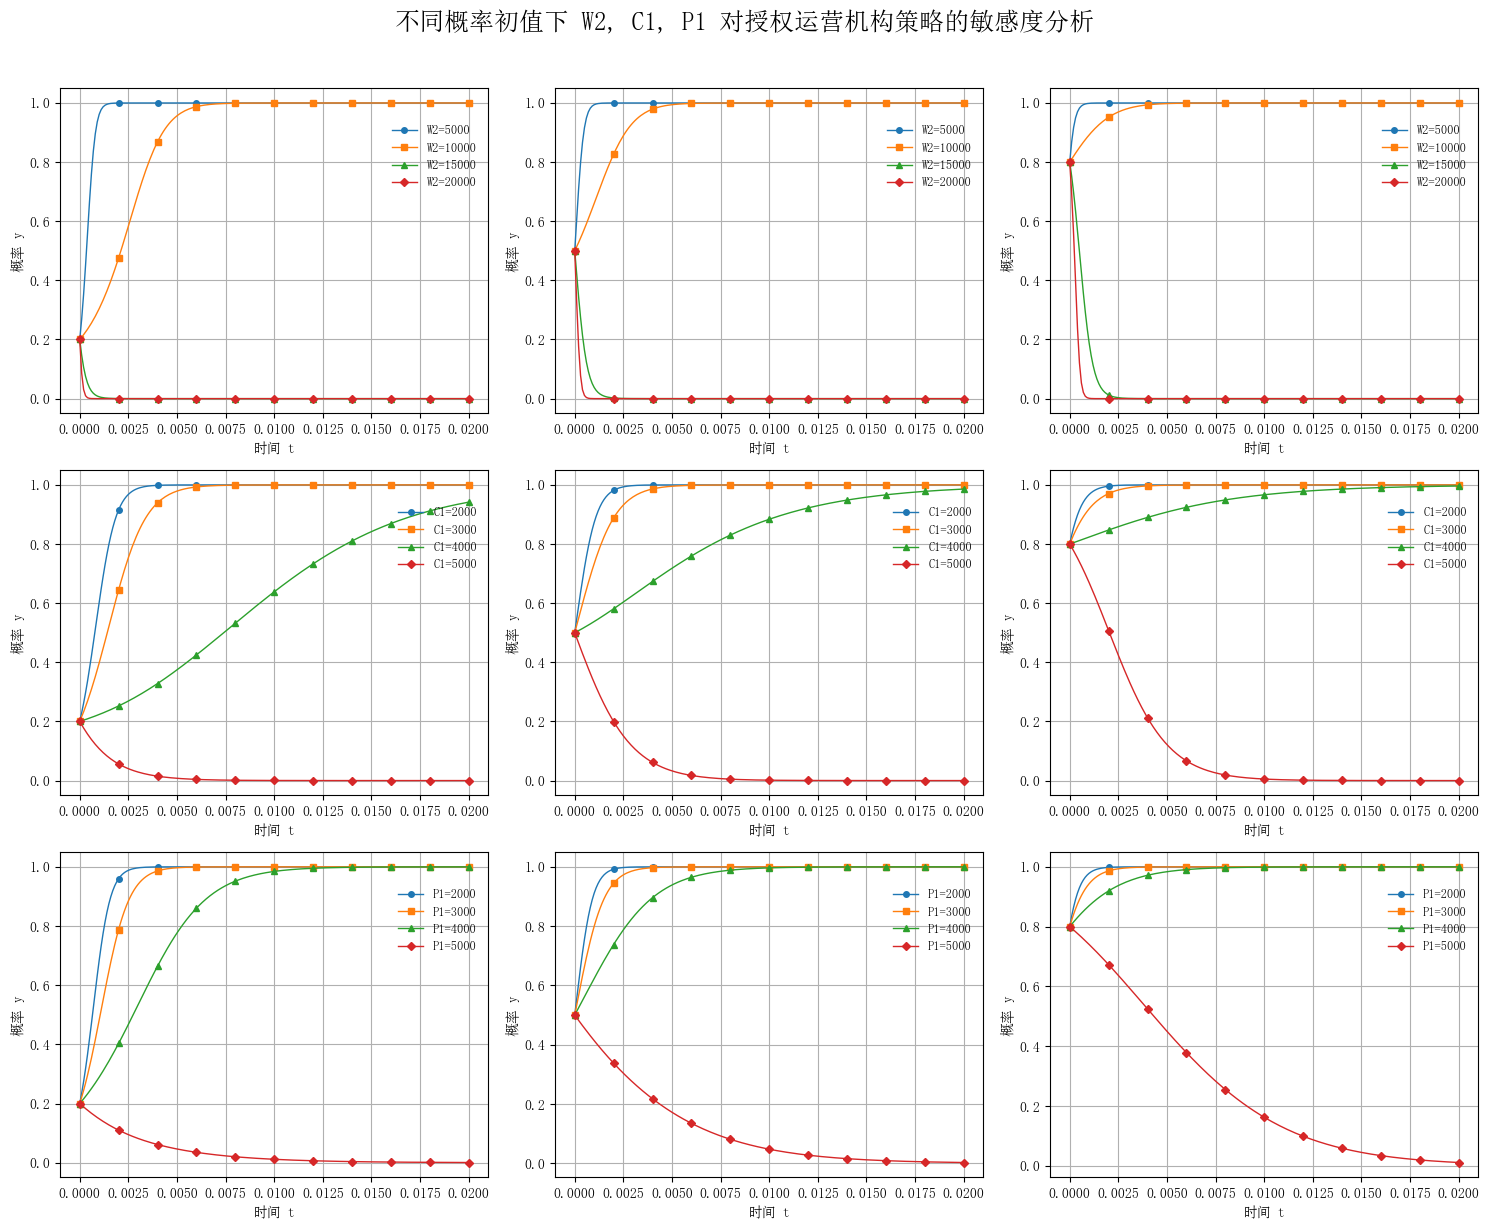

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimSun']
rcParams['axes.unicode_minus'] = False

# === 固定参数 ===
C2 = 3304
P2 = 1698
R  = 4600
g  = 0.15
U1 = 0.4 * C2
U2 = 0.1 * C2
T = 0.9*R
p = 0.2
Z1 = 0.1 * C2
Z2 = 0.05 * C2
k1 = 1.1
k2 = 0.9
a = 0.12
b = 1 - 0.12 - 0.12
c = 0.12
W1_fixed = 1.2*R
W2_fixed = 1.2 * (C2 + P2)
L1 = 0.1 * W1_fixed
L2 = 0.05*W1_fixed
P1_fixed = 413.32
C1_fixed = 0

# === 欧拉积分参数 ===
dt = 0.0001
steps = 200
t = np.linspace(0, dt*steps, steps+1)

# === 复制动态方程 ===
def Fx(x, y, z):
    return x*(1-x)*(a*z*(k1-k2)*(y*W1_fixed + (1-y)*W2_fixed) + L1 - L2 + p*(Z1+Z2) - U1 + U2)

def Fy_W(x, y, z, W_val, mode='W2'):
    if mode=='W2':
        term = (z*x*b*k1 + z*(1-x)*b*k2 + (1-z)*x*k1 + (1-z)*(1-x)*k2)*(W1_fixed-W_val) + C2-C1_fixed + P2-P1_fixed
    return y*(1-y)*(1-g) * term

def Fy_C1(x, y, z, C1_val):
    return y*(1-y)*(1-g) * ((z*x*b*k1 + z*(1-x)*b*k2 + (1-z)*x*k1 + (1-z)*(1-x)*k2)*(W1_fixed-W2_fixed) + C2-C1_val + P2-P1_fixed)

def Fy_P1(x, y, z, P1_val):
    return y*(1-y)*(1-g) * ((z*x*b*k1 + z*(1-x)*b*k2 + (1-z)*x*k1 + (1-z)*(1-x)*k2)*(W1_fixed-W2_fixed) + C2-C1_fixed + P2-P1_val)

def Fz(x, y, z):
    return z*(1-z) * ((x*k1 + (1-x)*k2)*(y*W1_fixed + (1-y)*W2_fixed)*(c + g*(b-1)) - R*(1-g) + T)

# === 参数扫描值 ===
param_dict = {
    'W2': [5000, 10000, 15000, 20000],
    'C1': [2000, 3000, 4000, 5000],
    'P1': [2000, 3000, 4000, 5000]
}

initial_values = [0.2, 0.5, 0.8]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
markers = ['o', 's', '^', 'D']

# === 创建 3x3 子图 ===
fig, axes = plt.subplots(3,3, figsize=(15,12))
axes = axes.flatten()

for row_idx, (param_name, values) in enumerate(param_dict.items()):
    for col_idx, init in enumerate(initial_values):
        ax_idx = row_idx*3 + col_idx
        ax = axes[ax_idx]
        for idx, val in enumerate(values):
            x = np.full(steps+1, init)
            y = np.full(steps+1, init)
            z = np.full(steps+1, init)
            for i in range(steps):
                x[i+1] = np.clip(x[i] + dt * Fx(x[i], y[i], z[i]), 0, 1)
                z[i+1] = np.clip(z[i] + dt * Fz(x[i], y[i], z[i]), 0, 1)
                if param_name=='W2':
                    y[i+1] = np.clip(y[i] + dt * Fy_W(x[i], y[i], z[i], val, mode='W2'), 0, 1)
                elif param_name=='C1':
                    y[i+1] = np.clip(y[i] + dt * Fy_C1(x[i], y[i], z[i], val), 0, 1)
                elif param_name=='P1':
                    y[i+1] = np.clip(y[i] + dt * Fy_P1(x[i], y[i], z[i], val), 0, 1)
            ax.plot(t, y, label=f'{param_name}={val}', color=colors[idx],
                    linestyle='-', marker=markers[idx], markevery=20, markersize=4, linewidth=1)
        ax.set_xlabel('时间 t')
        ax.set_ylabel('概率 y')
        ax.grid(True)
        ax.legend(loc='upper right',
              bbox_to_anchor=(1, 0.92),
              fontsize=9,
              frameon=False)

fig.suptitle('不同概率初值下 W2, C1, P1 对授权运营机构策略的敏感度分析', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### 敏感度分析-授权主体

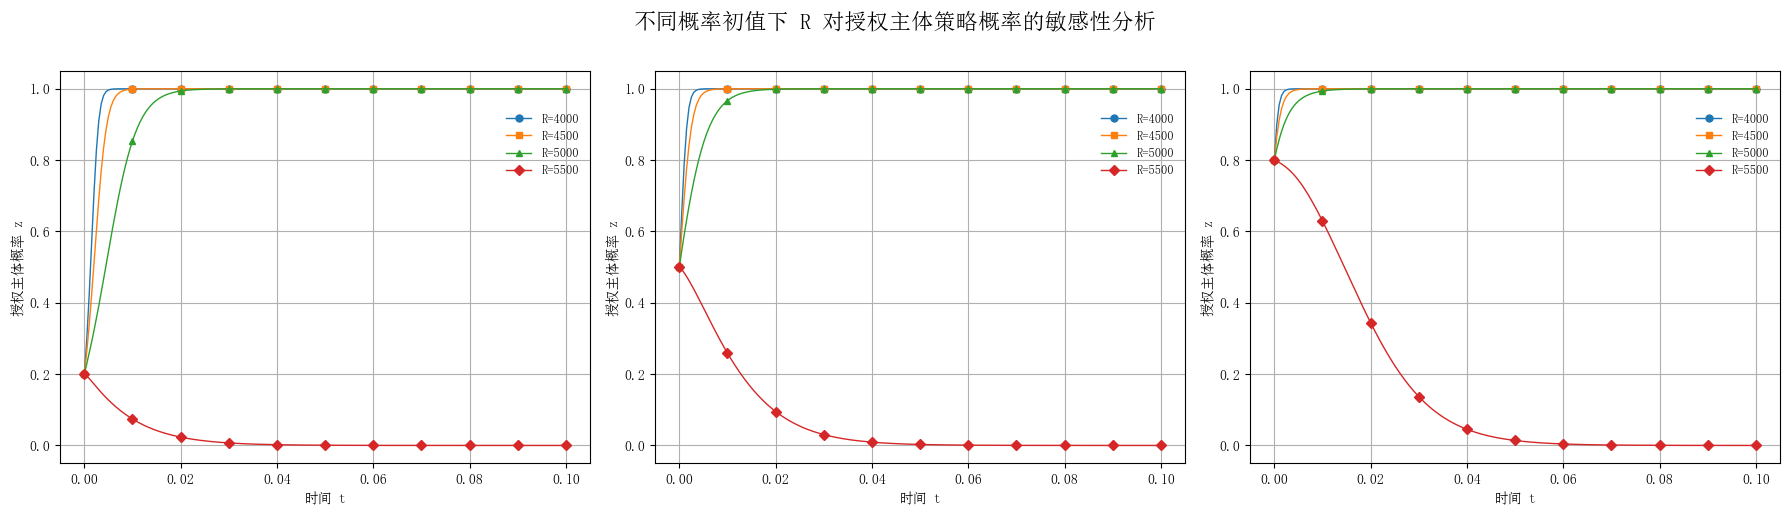

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimSun']
rcParams['axes.unicode_minus'] = False

# === 固定参数 ===
C1, C2 = 0, 3304
P1, P2 = 413.32, 1698
g = 0.15
U1, U2 = 0.4 * C2, 0.1 * C2
W1, W2 = 1.2 * 4600, 1.2 * (C2 + P2)
p = 0.2
Z1, Z2 = 0.1 * C2, 0.05 * C2
k1, k2 = 1.1, 0.9
a, b, c = 0.12, 0.76, 0.12
T = 0.9 * 4600
L1, L2 = 0.1 * W1, 0.05 * W1

# === 欧拉积分参数 ===
dt = 0.0005
steps = 200
t = np.linspace(0, dt*steps, steps+1)

# === 复制动态方程 ===
def Fx(x, y, z):
    return x*(1-x) * (a*z*(k1-k2)*(y*W1 + (1-y)*W2) + L1 - L2 + p*(Z1+Z2) - U1 + U2)

def Fy(x, y, z):
    term = (z*x*b*k1 + z*(1-x)*b*k2 + (1-z)*x*k1 + (1-z)*(1-x)*k2)*(W1-W2) + C2 - C1 + P2 - P1
    return y*(1-y)*(1-g) * term

def Fz(x, y, z, R_scan):
    return z*(1-z) * ((x*k1 + (1-x)*k2)*(y*W1 + (1-y)*W2)*(c + g*(b-1)) - R_scan*(1-g) + T)

# === R 灵敏度分析 ===
R_values = [4000, 4500, 5000, 5500]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
markers = ['o', 's', '^', 'D']
initial_values = [0.2, 0.5, 0.8]

# 创建 1x3 网格
fig, axes = plt.subplots(1,3, figsize=(18,5))

for ax_idx, init in enumerate(initial_values):
    ax = axes[ax_idx]
    for idx, R_scan in enumerate(R_values):
        x = np.full(steps+1, init)
        y = np.full(steps+1, init)
        z = np.full(steps+1, init)
        for i in range(steps):
            x[i+1] = np.clip(x[i] + dt * Fx(x[i], y[i], z[i]), 0, 1)
            y[i+1] = np.clip(y[i] + dt * Fy(x[i], y[i], z[i]), 0, 1)
            z[i+1] = np.clip(z[i] + dt * Fz(x[i], y[i], z[i], R_scan), 0, 1)
        ax.plot(t, z, label=f'R={R_scan}', color=colors[idx],
                linestyle='-', marker=markers[idx], markevery=20, markersize=5, linewidth=1)
    
    ax.set_xlabel('时间 t')
    ax.set_ylabel('授权主体概率 z')
    ax.grid(True)
    ax.legend(loc='upper right',
              bbox_to_anchor=(1, 0.92),
              fontsize=9,
              frameon=False)

plt.suptitle('不同概率初值下 R 对授权主体策略概率的敏感性分析', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()